In [1]:
import pynbody
import pynbody.plot.sph as sph
import pynbody.plot as pp
from pynbody.analysis import angmom
import matplotlib.pylab as plt
import numpy as np

In [23]:
s = pynbody.load('/home/michele/sim/MoRIA/sim69002/snapshot_0070')
# s = pynbody.load('/home/michele/sim/analysis/snapshot_0065')
# s.physical_units()
# sk = pynbody.load('/home/michele/sim/analysis/snapshot_0065.kicked')
# sk.physical_units()

In [24]:
# pynbody.analysis.angmom.sideon(s)

In [31]:
s1 = pynbody.load('/home/michele/sim/analysis/snapshot_0065')
s1.properties

{'time': Unit("5.72e+00 s kpc km**-1"),
 'omegaM0': 1.0,
 'omegaL0': 0.72,
 'boxsize': Unit("1.11e+01 kpc"),
 'a': 0.6552559150121577,
 'h': 0.7}

In [25]:
s.properties

{'time': Unit("5.97e+00 s kpc km**-1"),
 'omegaM0': 1.0,
 'omegaL0': 0.72,
 'boxsize': Unit("1.11e+01 kpc"),
 'a': 0.6737396838384792,
 'h': 0.7}

Try to explore cell n. 4

Plot stars

In [26]:
s.properties['boxsize'] = pynbody.units.Unit("1.11e+15 kpc")

In [27]:
#pynbody.plot.stars.render?

In [28]:
s.properties

{'time': Unit("5.97e+00 s kpc km**-1"),
 'omegaM0': 1.0,
 'omegaL0': 0.72,
 'boxsize': Unit("1.11e+15 kpc"),
 'a': 0.6737396838384792,
 'h': 0.7}

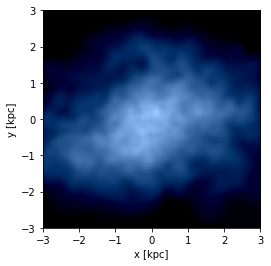

In [29]:
pynbody.analysis.halo.center(s)
pynbody.plot.stars.render(s.s, width=6)
plt.show()

In [21]:
simlist = [s, sk]

NameError: name 'sk' is not defined

In [ ]:
#you can also make a stream visualization instead of a quiver plot
#pynbody.analysis.angmom.faceon(h[1])
sph.velocity_image(s.g, width='100 Mpc', cmap = "Greys_r", mode='stream', units='Msol kpc^-2',
                   density=3.0, vector_resolution=100, vmin=1e-3,
                   show_cbar=False, vector_color='black')
plt.show()

In [ ]:
s.g['temp']

In [ ]:
# sph.velocity_image(s.g, vector_color="cyan", qty="temp", cmap="YlOrRd",
#                    denoise=True, approximate_fast=False, show_cbar = False)

In [ ]:
#create a simple slice showing the gas temperature, with velocity vectors overlaid

# f, axs = plt.subplots(1,2,figsize=(14,6))

# simlist = [s, sk]
# for i, s in enumerate(simlist):
#     print('Printing ', s.filename)
#     sph.velocity_image(s.g, vector_color="cyan", qty="temp", cmap="YlOrRd",
#                        denoise=True,approximate_fast=False, show_cbar = False, subplot=axs[i])
# plt.show()

# Working plots

In [ ]:
s.s.loadable_keys()

In [ ]:
simname='f'
pp.sfh(s,filename="f"+'.sfh.png',nbins=500);

## Rotation curve

In [ ]:
pp.rotation_curve(s, filename=simname+'.rc.png', quick=True,
                  max='40 kpc', center=False);

## Rotation curve with parts

In [ ]:
pp.rotation_curve(s, filename=simname+'.rcparts.png', quick=True,
                  parts=True, legend=True, max='40 Mpc', center=False);

## Density temperature

In [ ]:
pp.rho_T(s,filename=simname+'.phase.png');

## Star density and dark matter density profiles

In [ ]:
# create a profile object for the stars (by default this is a 2D profile)
p = pynbody.analysis.profile.Profile(s.s, min=.01, max=50)

# make the figure and sub plots
f, axs = plt.subplots(1, 2, figsize=(14,6))

# make the plot
axs[0].plot(p['rbins'], p['density'], 'k')
axs[0].semilogy()
axs[0].set_xlabel('R [kpc]')
axs[0].set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')

# make a 3D density plot of the dark matter (note ndim=3 in the constructor below)
p = pynbody.analysis.profile.Profile(s.d, min=.01, max=50, ndim=3)

axs[1].plot(p['rbins'], p['density'], 'k')
axs[1].semilogy()
axs[1].set_xlabel('R [kpc]')
axs[1].set_ylabel(r'$\rho_{DM}$ [M$_{\odot}$ kpc$^{-3}$]')
plt.savefig(filename=simname+'.density_profiles.png')

## Surface brightness profile in V band 

In [ ]:
pp.sbprofile(s, filename=simname+'.sbprof.png', 
             center=False, rmax='100 Mpc', diskheight='400 Mpc')  # Surface brightness profile

## Dark matter density profile
To plot the y value in terms of rho_{cr} (only if in_units parameter is None) it is using the h value sim.properties['h]
It is plotting the error bar dividing the value of the density for the number of particle in the bin

In [ ]:
pp.density_profile(s.dark, filename=simname+'.dmprof.png', center=False)

# Not working plots

In [ ]:
pp.guo(s, baryfrac=True, filename=simname+'.guo.png')

In [ ]:
pp.ofefeh(s.stars, filename=simname+'.ofefeh.png',
          weights=s.stars['mass'].in_units('Msol'), scalemin=1e3,
          scalemax=1e6, x_range=[-3,0.3],y_range=[-0.5,1.0])

In [ ]:
# Trying to center the rotation curve
t = angmom.faceon(s, cen_size='400 Mpc')
pp.rotation_curve(t, filename=simname+'.rcparts.png', quick=True,
                  parts=True, legend=True, min='0 Mpc', max='40 Mpc', center=False)

In [ ]:
# import pynbody.plot as pp
# simname = 'ppp'
# ### Make plots
# # try:

# pp.ofefeh(h[i].stars, filename=simname+'.ofefeh.png',
#               weights=h[i].stars['mass'].in_units('Msol'), scalemin=1e3,
#               scalemax=1e6, x_range=[-3,0.3],y_range=[-0.5,1.0])
# pp.mdf(h[i].stars,filename=simname+'.mdf.png', range=[-4,0.5])
# pp.guo(h,baryfrac=True,filename=simname+'.guo.png')
# pp.schmidtlaw(h[i],filename=simname+'.schmidt.png',center=False)
# pp.satlf(h[i],filename=simname+'.satlf.png')
# # except:
# #     pass

In [10]:
t = angmom.faceon(s, cen_size='1 Mpc')
pp.rotation_curve(t, filename=simname+'.rcparts.png', quick=True,
                  parts=True, legend=True, min='0 Mpc', max='40 Mpc', center=False)

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/analysis/angmom.py:78: RuntimeWarning: invalid value encountered in true_divide
  vec_in = vec_in / np.sum(vec_in ** 2).sum() ** 0.5


ValueError: Transformation matrix is not orthogonal